In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
max_len = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)



(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# restore np.load for future normal usage
np.load = np_load_old

print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Loading data...
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [3]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable para

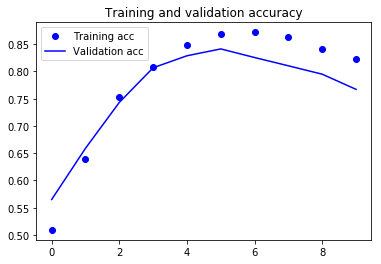

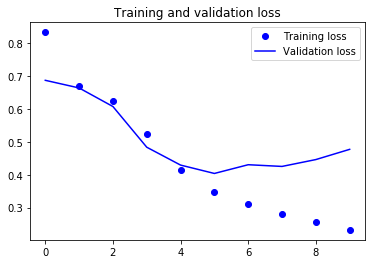

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
from keras.datasets import reuters
from keras.preprocessing.sequence import pad_sequences
max_len=100
vocab_size=1000
(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=vocab_size, # use top 1000 frequent words
                                                         skip_top=5, # skip top frequency word
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [20]:
x_train = pad_sequences(x_train, maxlen=max_len)
x_test =  pad_sequences(x_test, maxlen=max_len)

In [21]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D
model = Sequential()
model.add(Embedding(1000, 8, input_length=max_len))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu')) #
model.add(Flatten())
model.add(Dense(512, activation='relu')) #
model.add(Dropout(0.5)) #
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 8)            8000      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 100, 32)           800       
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               1638912   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 46)                23598     
Total params: 1,671,310
Trainable params: 1,671,310
Non-trainable params: 0
_________________________________________________________________


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  


In [22]:
from keras.utils import np_utils # one hot encode the y-label
y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)

In [23]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 5s 643us/step - loss: 1.9810 - acc: 0.4850 - val_loss: 1.6991 - val_acc: 0.5795
Epoch 2/10
8083/8083 [==============================] - 5s 589us/step - loss: 1.5644 - acc: 0.5879 - val_loss: 1.5402 - val_acc: 0.6062
Epoch 3/10
8083/8083 [==============================] - 5s 566us/step - loss: 1.3069 - acc: 0.6613 - val_loss: 1.4475 - val_acc: 0.6507
Epoch 4/10
8083/8083 [==============================] - 5s 558us/step - loss: 1.1368 - acc: 0.7027 - val_loss: 1.3920 - val_acc: 0.6719
Epoch 5/10
8083/8083 [==============================] - 5s 591us/step - loss: 0.9858 - acc: 0.7340 - val_loss: 1.3857 - val_acc: 0.6808
Epoch 6/10
8083/8083 [==============================] - 5s 557us/step - loss: 0.8415 - acc: 0.7691 - val_loss: 1.4476 - val_acc: 0.6752
Epoch 7/10
8083/8083 [==============================] - 4s 526us/step - loss: 0.6993 - acc: 0.8071 - val_loss: 1.4898 - val_acc: 0.6741
E

In [24]:
score = model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 52us/step


In [25]:
score

[1.7714343474363494, 0.653606411398041]

In [42]:
from keras.datasets import reuters
from keras.preprocessing.sequence import pad_sequences
maxlen=1500 # specify the max number of words of each newswire you want
vocab_size=1000
(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=vocab_size, # use top 1000 frequent words
                                                         skip_top=5, # skip top frequency word
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [43]:
from keras.preprocessing.text import Tokenizer

In [44]:
tokenizer = Tokenizer(num_words=maxlen)


In [45]:
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

In [46]:
from keras.utils import np_utils # one hot encode the y-label

In [47]:
y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(256, input_shape=(maxlen,), activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               384256    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 46)                11822     
Total params: 396,078
Trainable params: 396,078
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/20
8083/8083 [==============================] - 1s 98us/step - loss: 0.1256 - acc: 0.9569 - val_loss: 1.2565 - val_acc: 0.7909
Epoch 2/20
8083/8083 [==============================] - 1s 91us/step - loss: 0.1358 - acc: 0.9567 - val_loss: 1.2273 - val_acc: 0.7864
Epoch 3/20
8083/8083 [==============================] - 1s 94us/step - loss: 0.1341 - acc: 0.9592 - val_loss: 1.2507 - val_acc: 0.7898
Epoch 4/20
8083/8083 [==============================] - 1s 89us/step - loss: 0.1239 - acc: 0.9598 - val_loss: 1.2887 - val_acc: 0.7942
Epoch 5/20
8083/8083 [==============================] - 1s 91us/step - loss: 0.1183 - acc: 0.9624 - val_loss: 1.3251 - val_acc: 0.7875
Epoch 6/20
8083/8083 [==============================] - 1s 93us/step - loss: 0.1190 - acc: 0.9607 - val_loss: 1.3003 - val_acc: 0.7875
Epoch 7/20
8083/8083 [==============================] - 1s 92us/step - loss: 0.1169 - acc: 0.9614 - val_loss: 1.3025 - val_acc: 0.7931
Epoch 8/

In [52]:
score = model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 25us/step


In [55]:
score

[1.2049899294454927, 0.7889581478183437]

In [71]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 1500  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

In [72]:
word_index = tokenizer.word_index

In [73]:
glove_dir = 'glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [74]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [75]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(46, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 1500, 100)         1000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 150000)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                4800032   
_________________________________________________________________
dense_19 (Dense)             (None, 46)                1518      
Total params: 5,801,550
Trainable params: 5,801,550
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [77]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                     validation_split=0.1)
model.save_weights('pre_trained_glove_model.h5')


Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 10s 1ms/step - loss: 3.6837 - acc: 0.3481 - val_loss: 3.5551 - val_acc: 0.3315
Epoch 2/10
8083/8083 [==============================] - 9s 1ms/step - loss: 3.4281 - acc: 0.3540 - val_loss: 3.3198 - val_acc: 0.3315
Epoch 3/10
8083/8083 [==============================] - 9s 1ms/step - loss: 3.2026 - acc: 0.3540 - val_loss: 3.1140 - val_acc: 0.3315
Epoch 4/10
8083/8083 [==============================] - 8s 1ms/step - loss: 3.0053 - acc: 0.3540 - val_loss: 2.9370 - val_acc: 0.3315
Epoch 5/10
8083/8083 [==============================] - 8s 1ms/step - loss: 2.8377 - acc: 0.3540 - val_loss: 2.7910 - val_acc: 0.3315
Epoch 6/10
8083/8083 [==============================] - 8s 1ms/step - loss: 2.7003 - acc: 0.3540 - val_loss: 2.6760 - val_acc: 0.3315
Epoch 7/10
8083/8083 [==============================] - 9s 1ms/step - loss: 2.5954 - acc: 0.3540 - val_loss: 2.5922 - val_acc: 0.3315
Epoch 8/10
808

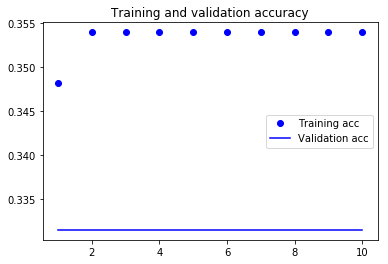

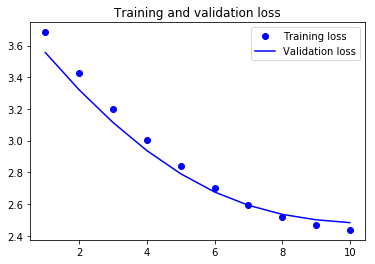

In [78]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [87]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(46, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split = 0.1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 1500, 100)         1000000   
_________________________________________________________________
flatten_11 (Flatten)         (None, 150000)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                4800032   
_________________________________________________________________
dense_31 (Dense)             (None, 46)                1518      
Total params: 5,801,550
Trainable params: 5,801,550
Non-trainable params: 0
_________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 11s 1ms/step - loss: 1.8345 - acc: 0.6208 - val_loss: 1.2544 - val_acc: 0.7241
Epoch 2/10
8083/8083 [==============================] - 11s 1ms/step - loss: 0.929

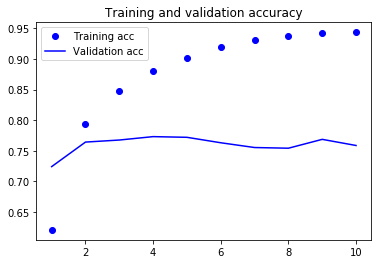

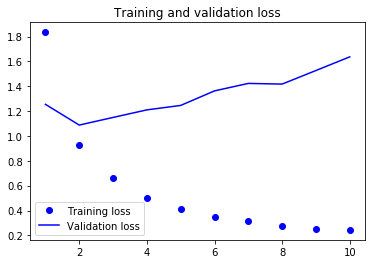

In [88]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [89]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 183us/step


[2.43911668793601, 0.36197684778237277]